In [73]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as cal
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [74]:
data = pd.read_csv("breast-cancer.csv")
data

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [75]:
data.columns.values

array(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype=object)

In [76]:
data["node-caps"].value_counts()

'no'     222
'yes'     56
?          8
Name: node-caps, dtype: int64

In [77]:
#handel nan value
data["node-caps"].replace({'?':"'no'"},inplace = True)
data["node-caps"].value_counts()

'no'     230
'yes'     56
Name: node-caps, dtype: int64

In [78]:
data.describe()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
count,286,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,2,3,2,6,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,230,130,152,110,218,201


In [79]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [80]:
# Convert string data to number, using Label Encoder
features = data.columns.values
encoders = dict()
for cat in features:
    encoders[cat] = LabelEncoder()
    data[f'{cat}'] = encoders[cat].fit_transform(data[cat])

In [81]:
data.head(5)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,2,2,0,1,2,1,2,0,1
1,3,0,2,0,0,0,1,0,0,0
2,3,0,6,0,0,1,0,1,0,1
3,2,2,6,0,1,2,1,1,1,0
4,2,2,5,4,1,1,0,4,0,1


In [82]:
# Feature Selection
features = ["age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"] 
target = ["Class"]
X = data[features]
y = data[target]
y = y.squeeze() # Convert to Series

In [83]:
# Split data into training and testing data
# Use standard 10% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=99) 

In [84]:
X_train.loc[105]

age            4
menopause      0
tumor-size     5
inv-nodes      4
node-caps      1
deg-malig      1
breast         0
breast-quad    0
irradiat       1
Name: 105, dtype: int32

In [85]:
# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', random_state=0)
logistic_model.fit(X_train,y_train)
y_pred_lm = logistic_model.predict(X_test)
print("Accuracy:", logistic_model.score(X_test, y_test))

Accuracy: 0.8620689655172413


In [86]:
# SVM  Model
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C = 1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy:", svm_model.score(X_test, y_test))

Accuracy: 0.7586206896551724


In [87]:
# imports for confusion matix
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

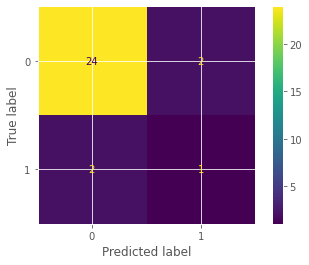

In [88]:
# Confusion matrix for logistic model
cm = confusion_matrix(y_test, y_pred_lm, labels=logistic_model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

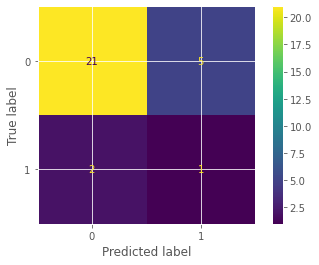

In [89]:
# Confusion matrix for SVM model
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [90]:
import joblib 

#Serialize save the model as an object
joblib.dump(logistic_model, 'C:data-files/model.pkl')
print("Model dumped!")

#Serialize save the label encoders as an object
joblib.dump(encoders, 'data-files/le.pkl')
print("Encoders dumped!")

#Serialize save the model columns as an object
features_decode = ["age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]
joblib.dump(features_decode, 'data-files/model_columns.pkl')
print("Models columns dumped!")

Model dumped!
Encoders dumped!
Models columns dumped!
